## Importing and Preparation

In [2]:
# Importing all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
%cd C:\Users\neelg\Dropbox\UTDallas\Applied Machine Learning\Applied_ML_Project1

C:\Users\neelg\Dropbox\UTDallas\Applied Machine Learning\Applied_ML_Project1


In [4]:
# Reading in the data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
# Replace about 10 percent of the data with np.nan
for i in range((int)(df.size * 0.05)):
    row_index = np.random.randint(df.shape[0])
    col_index = np.random.randint(df.shape[1])
    df.iloc[row_index,col_index] = np.nan

# Check what percentage of the data is missing
val = 0
for col in df.columns:
    val += df[col].count()

print(val / df.size)

0.951150416151126


In [6]:
df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,NaN,No,No,NaN,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,NaN,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,NaN,0.0,No,NaN,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,NaN,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,NaN,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.describe() # Summary of the numeric variables

,SeniorCitizen,tenure,MonthlyCharges
count,6692.000000,6686.000000,6725.000000
mean,0.162283,32.466946,64.779732
std,0.368738,24.558151,30.100668
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.450000
50%,0.000000,29.000000,70.350000
75%,0.000000,56.000000,89.900000
max,1.000000,72.000000,118.750000


## Cleaning the Data

In [8]:
# Checking the data types of the variables
df.dtypes

customerID           object
gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce') # Changing 'TotalCharges' from object to numeric data type

In [10]:
df.isnull().sum() # Checking which columns have missing values and how many

customerID          328
gender              333
SeniorCitizen       351
Partner             348
Dependents          383
tenure              357
PhoneService        354
MultipleLines       331
InternetService     335
OnlineSecurity      335
OnlineBackup        350
DeviceProtection    356
TechSupport         333
StreamingTV         339
StreamingMovies     332
Contract            373
PaperlessBilling    352
PaymentMethod       345
MonthlyCharges      318
TotalCharges        364
Churn               319
dtype: int64

In [11]:
# Replacing the missing values in the numeric variables with their mean
df.MonthlyCharges.fillna(df.MonthlyCharges.mean(), inplace=True)
df.TotalCharges.fillna(df.TotalCharges.mean(), inplace=True)
df.tenure.fillna(df.tenure.mean(),inplace=True)

# Replacing the missing values in the categorical varibles with their mode
for i in df.iloc[:,np.r_[1:5,6:18,20]].columns:
    df['{}'.format(i)].fillna(df['{}'.format(i)].mode()[0],inplace=True)

In [12]:
df = df.drop(['customerID'], axis=1) # Dropping 'CustomerID' from our analysis as it is a noise variable
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object') # Changing 'SeniorCitizen' from numeric to object data type

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# Explanatory Data Analysis

From the Graphs below we can conclude that:
- 40% of Senior Citizens churned compared to 23% of Non-Senior Citizens
- 38% of customers with Fiber Optic churned compared to 18% of DSL customers and 7% of customers without internet service
- 39% of customers who are on month-to-month contract churned compared to 11% for customers on a One-year contract and 3% for customers on a two-year contract
- 41% of customers who paid with electronic check churned compared to 16% ,14%, or 18% of customers who paid with bank transfer, credit card, or mailed check, respectively

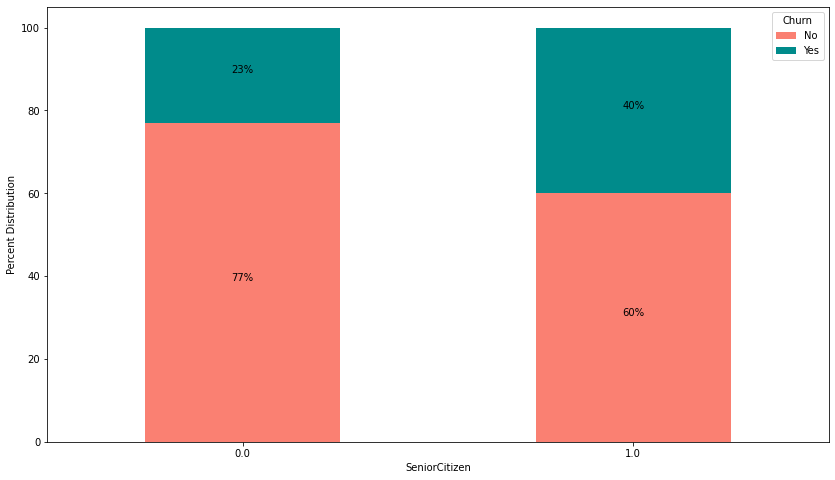

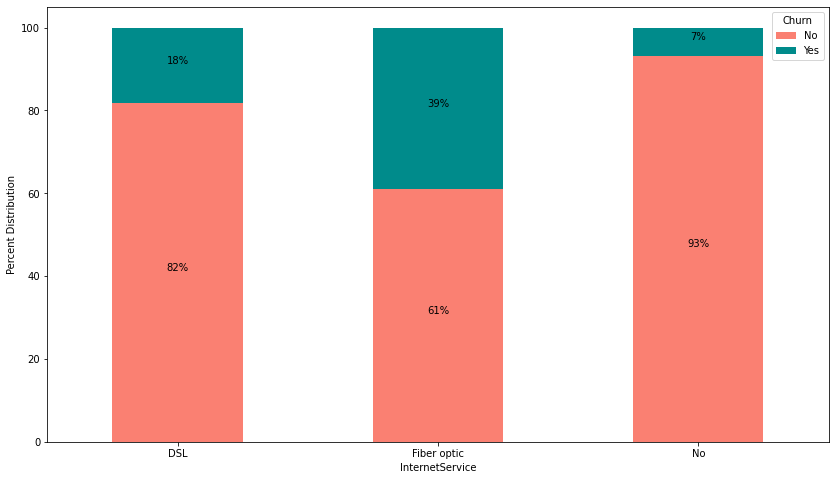

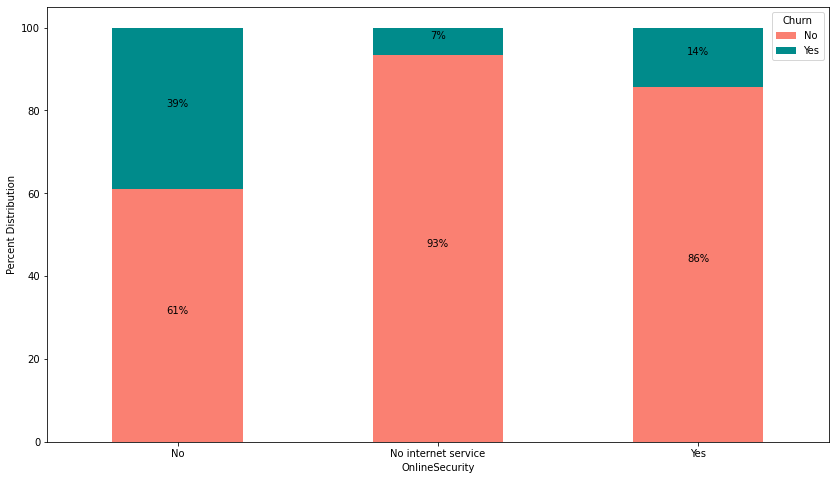

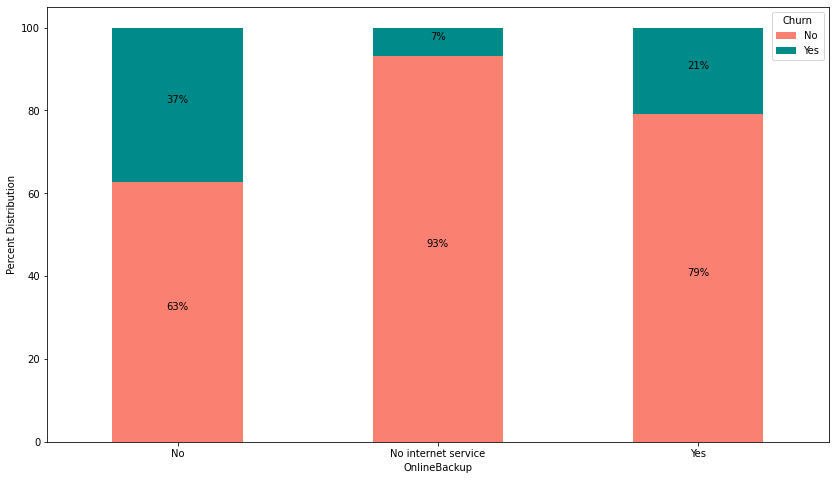

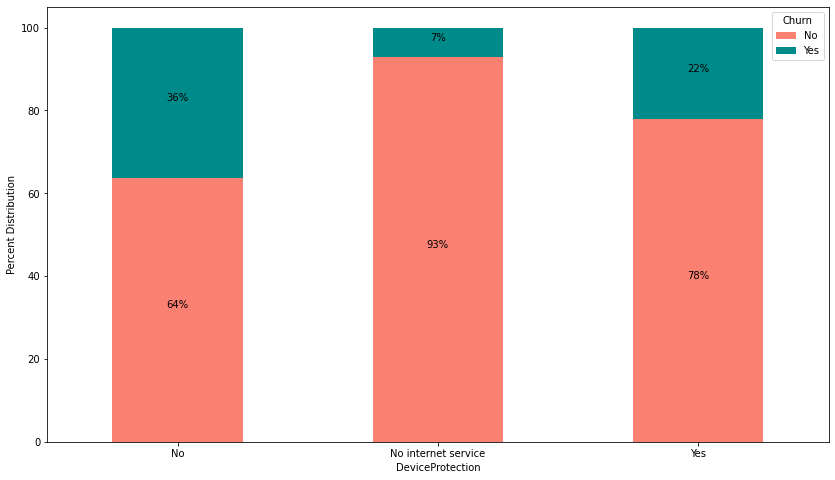

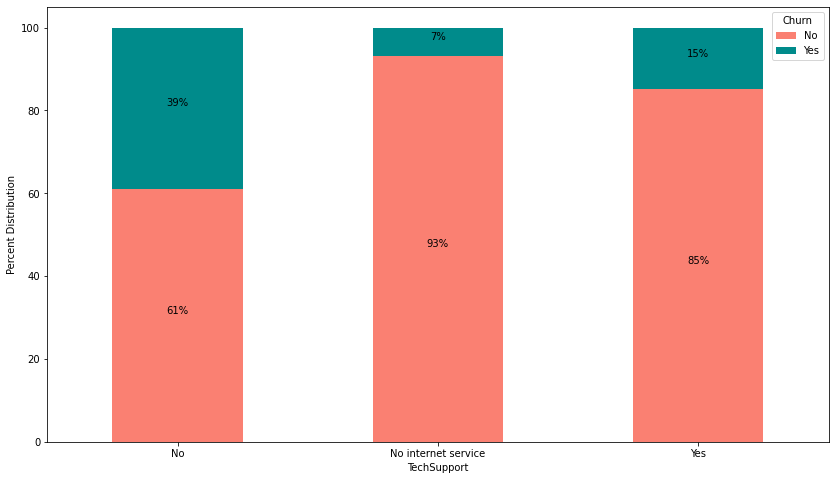

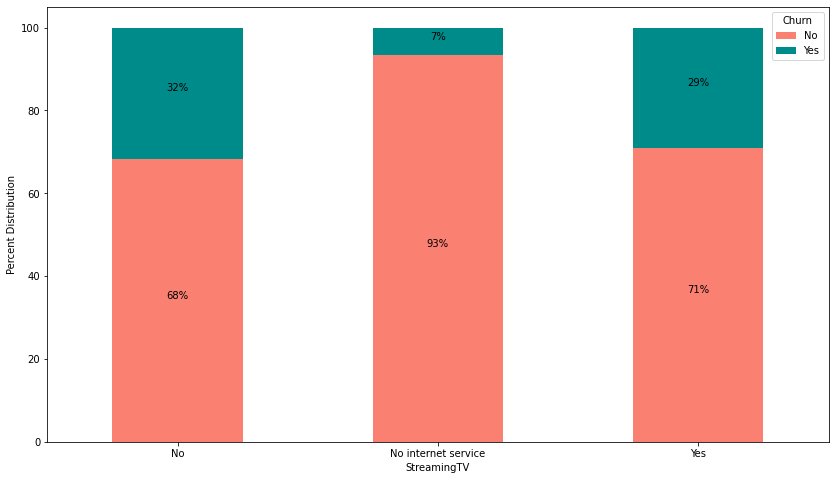

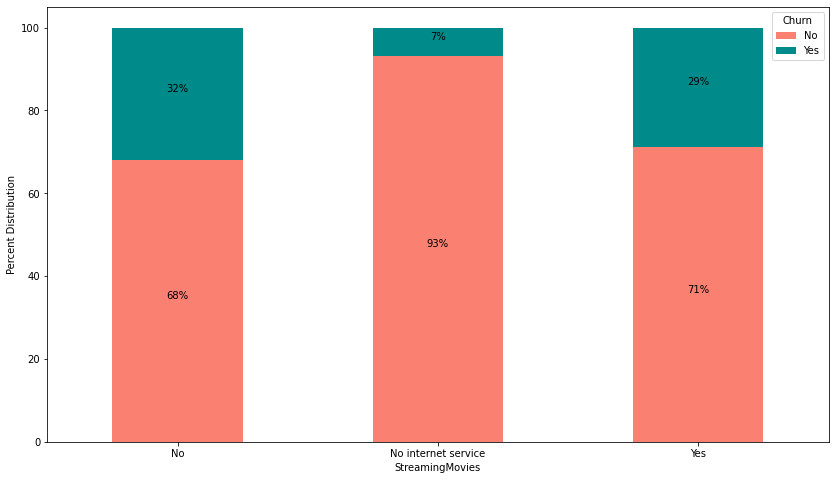

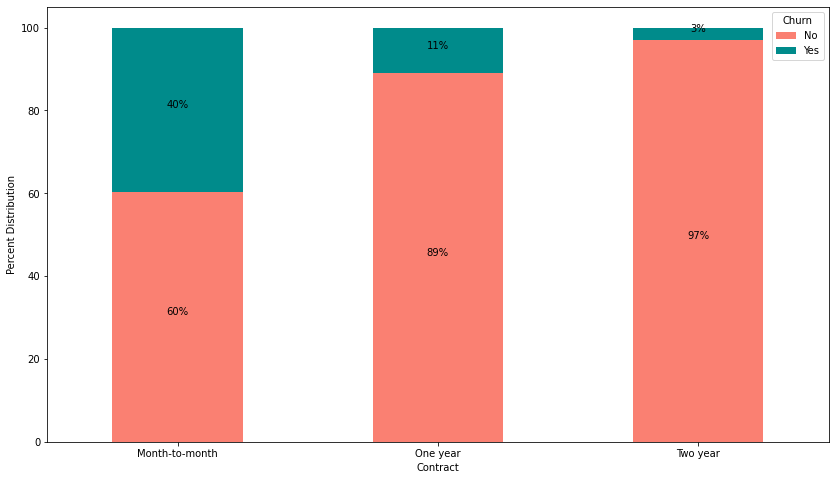

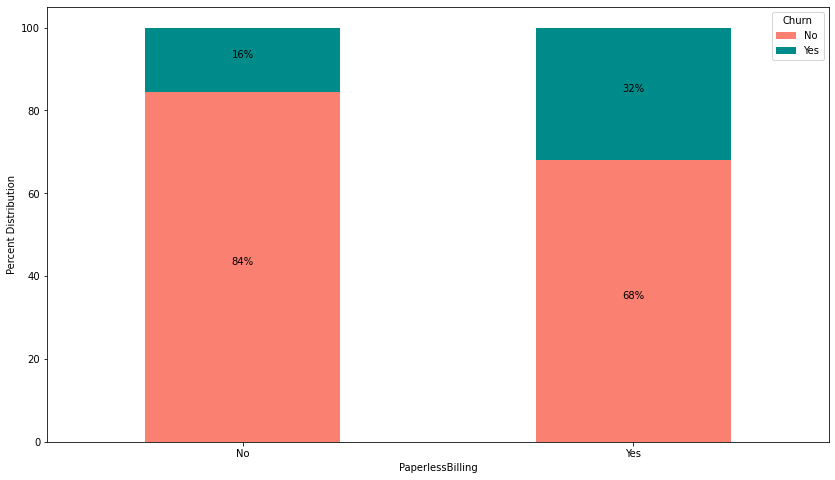

In [14]:
for col in df.iloc[:,np.r_[1,7:16]].columns:
    colors = ['salmon','darkcyan']
    ax= pd.crosstab(df['{}'.format(col)], df['Churn']).apply(lambda r: r/r.sum()*100, axis=1)
    ax_1 = ax.plot.bar(figsize=(14,8),stacked=True, rot=0,color=colors)
    plt.legend(loc='best', title="Churn")
    plt.xlabel('{}'.format(col))
    plt.ylabel('Percent Distribution')
    for rec in ax_1.patches:
        height = rec.get_height()
        ax_1.text(rec.get_x() + rec.get_width() / 2, 
                  rec.get_y() + height / 2,
                  "{:.0f}%".format(height),
                  ha='center', 
                  va='bottom')
plt.show()

In [15]:
# Converting Categorical variables to numerical variables using map function/one-hot encoding

df['gender'] = df['gender'].map({'Male':1, 'Female':0}).astype(int)
df['Partner'] = df['Partner'].map({'Yes':1, 'No':0}).astype(int)
df['Dependents'] = df['Dependents'].map({'Yes':1, 'No':0}).astype(int)
df['PhoneService'] = df['PhoneService'].map({'Yes':1, 'No':0}).astype(int)
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes':1, 'No':0}).astype(int)
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0}).astype(int)
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)

df = pd.get_dummies(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028D99A42F10>,
      dtype=object)

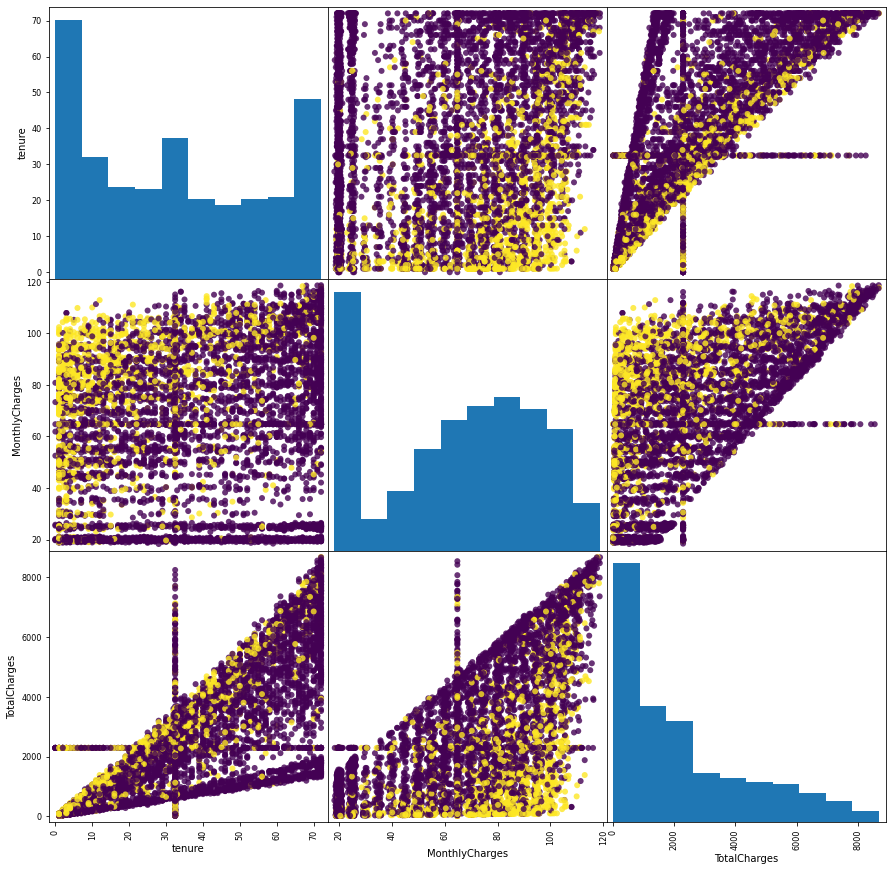

In [16]:
# plotting the scatter matrix of the data
%matplotlib inline
from pandas.plotting import scatter_matrix

features = df.loc[:,['tenure','MonthlyCharges','TotalCharges']]
target = np.array(df.loc[:,['Churn']])
scatter_matrix(df.loc[:,['tenure','MonthlyCharges','TotalCharges']],c=target, figsize = (15,15), alpha = 0.8, marker = 'O')

In [17]:
# Splitting the data into features and target sets
y = df.Churn
X = df.drop('Churn', axis=1)

#### For this data MinMaxScaler was used because MinMaxScaler struggles without outliers, which this dataset does not contain.

In [18]:
# Scaling the data and splitting into train/test split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

#### The evaluation strategy used for this Business Case is Precision. In this case, we could like to limit the number of False Negatives because the cost of losing a customer is high. The cost of advertising to a customer who we think is going to churn, but is not actually going to churn is low. 

## KNN Classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score = knn.predict(X_train)
    train_score_array.append(precision_score(y_train, train_score))
    test_score = knn.predict(X_test)
    test_score_array.append(precision_score(y_test, test_score))

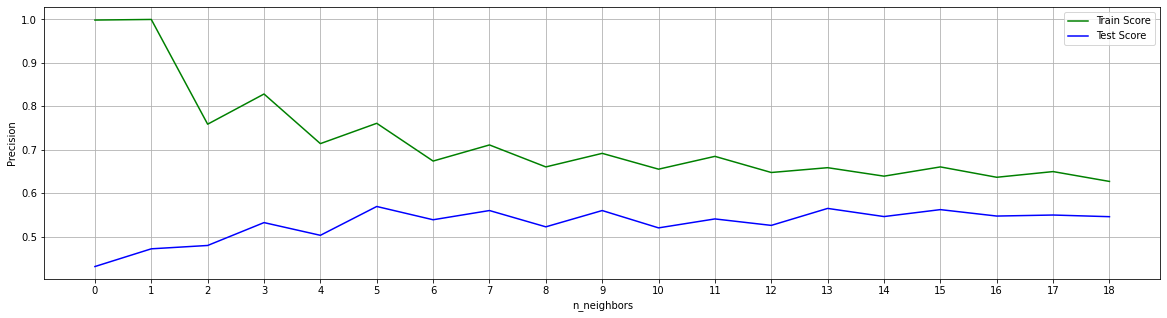

In [19]:
x_axis = range(1,20)
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('n_neighbors')
plt.ylabel('Precision')
plt.xticks(x_axis, np.arange(20))
plt.grid()
plt.legend()

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_params = {'n_neighbors':range(1,20)}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, return_train_score=True,scoring='precision')
knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)}, return_train_score=True,
             scoring='precision')

In [21]:
from sklearn.metrics import precision_score

knn_train_pred = knn_grid_search.predict(X_train)
knn_train_score = precision_score(y_train,knn_train_pred)
knn_test_pred = knn_grid_search.predict(X_test)
knn_test_score = precision_score(y_test,knn_test_pred)

print("Best parameters: {}".format(knn_grid_search.best_params_))
print("Train precision score: {:.2f}".format(knn_train_score))
print("Test precision score: {:.2f}".format(knn_test_score))

Best parameters: {'n_neighbors': 10}
Train precision score: 0.69
Test precision score: 0.56


## Linear Support Vector Machine

In [22]:
import warnings
warnings.filterwarnings('ignore') 

from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

Linear_SVC_params = {'penalty':['l1','l2'],'C':[0.001, 0.01, 0.1, 1, 10, 100]}

Linear_SVC_grid_search = GridSearchCV(LinearSVC(max_iter=100000,dual=False), Linear_SVC_params, cv=5, return_train_score=True,scoring='precision',verbose=1)
Linear_SVC_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   17.7s finished


GridSearchCV(cv=5, estimator=LinearSVC(dual=False, max_iter=100000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='precision', verbose=1)

In [23]:
Linear_SVC_train_pred = Linear_SVC_grid_search.predict(X_train)
Linear_SVC_train_score = precision_score(y_train,Linear_SVC_train_pred)
Linear_SVC_test_pred = Linear_SVC_grid_search.predict(X_test)
Linear_SVC_test_score = precision_score(y_test,Linear_SVC_test_pred)

print("Best parameters: {}".format(Linear_SVC_grid_search.best_params_))
print("Train precision score: {:.2f}".format(Linear_SVC_train_score))
print("Test precision score: {:.2f}".format(Linear_SVC_test_score))

Best parameters: {'C': 0.01, 'penalty': 'l1'}
Train precision score: 0.67
Test precision score: 0.65


## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear', max_iter = 500)
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs', max_iter = 500)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    l1_train_pred = log_l1.predict(X_train)
    l2_train_pred = log_l2.predict(X_train)
    l1_test_pred = log_l1.predict(X_test)
    l2_test_pred = log_l2.predict(X_test)
    
    train_score_l1.append(precision_score(y_train, l1_train_pred))
    train_score_l2.append(precision_score(y_train, l2_train_pred))
    test_score_l1.append(precision_score(y_test, l1_test_pred))
    test_score_l2.append(precision_score(y_test, l2_test_pred))

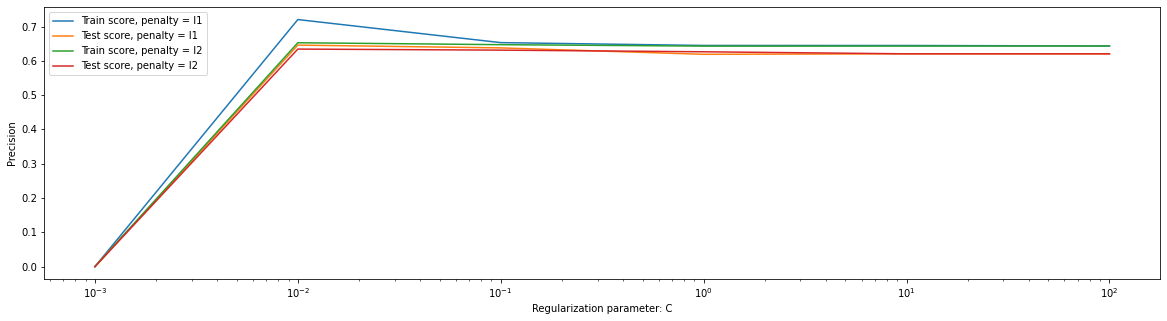

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Precision')
plt.xscale('log')

In [26]:
from sklearn.linear_model import LogisticRegression

LR_params = {'penalty':['l1','l2'],'C':[0.001, 0.01, 0.1, 1, 10, 100]}

LR_grid_search = GridSearchCV(LogisticRegression(max_iter=10000), LR_params, cv=5, return_train_score=True,scoring='precision')
LR_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='precision')

In [27]:
LR_train_pred = LR_grid_search.predict(X_train)
LR_train_score = precision_score(y_train,LR_train_pred)
LR_test_pred = LR_grid_search.predict(X_test)
LR_test_score = precision_score(y_test,LR_test_pred)

print("Best parameters: {}".format(Linear_SVC_grid_search.best_params_))
print("Train precision score: {:.2f}".format(LR_train_score))
print("Test precision score: {:.2f}".format(Linear_SVC_test_score))

Best parameters: {'C': 0.01, 'penalty': 'l1'}
Train precision score: 0.65
Test precision score: 0.65


## Decision Tree

In [104]:
from sklearn.tree import DecisionTreeClassifier

DT_params = {'criterion':['gini','entropy'],'max_depth':[3,5,7,10,15],'min_samples_split':[2,4,6]}

DT_grid_search = GridSearchCV(DecisionTreeClassifier(), DT_params, cv=5, return_train_score=True,scoring='precision')
DT_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 15],
                         'min_samples_split': [2, 4, 6]},
             return_train_score=True, scoring='precision')

In [105]:
DT_train_pred = DT_grid_search.predict(X_train)
DT_train_score = precision_score(y_train,DT_train_pred)
DT_test_pred = DT_grid_search.predict(X_test)
DT_test_score = precision_score(y_test,DT_test_pred)

print("Best parameters: {}".format(DT_grid_search.best_params_))
print("Train precision score: {:.2f}".format(DT_train_score))
print("Test precision score: {:.2f}".format(DT_test_score))

Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Train precision score: 0.68
Test precision score: 0.58


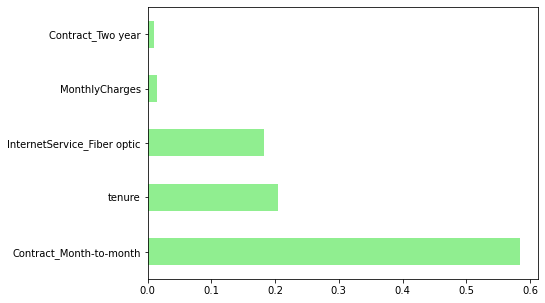

In [30]:
(pd.Series(DT_grid_search.best_estimator_.feature_importances_, index=X.columns)
   .nlargest(5)
   .plot(kind='barh',fontsize=10,figsize=(7,5),color='LightGreen'))

#### Using the Decision Tree's Feature importance function we can see that the most important feature to predict churn are:
- Month-to-Month Contract
- Tenure
- Fiber Optics Internet
- Monthly Charges
- Total Charges

## RBF Support Vector Machine

In [31]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

SVC_params = {'kernel':['rbf'],'C':[0.001, 0.01, 0.1, 1, 10, 100],'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

SVC_grid_search = GridSearchCV(SVC(), SVC_params, cv=5, return_train_score=True,scoring='precision',verbose=1)
SVC_grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  7.7min finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf']},
             return_train_score=True, scoring='precision', verbose=1)

In [32]:
SVC_rbf_train_pred = SVC_grid_search.predict(X_train)
SVC_rbf_train_score = precision_score(y_train,SVC_rbf_train_pred)
SVC_rbf_test_pred = SVC_grid_search.predict(X_test)
SVC_rbf_test_score = precision_score(y_test,SVC_rbf_test_pred)

print("Best parameters: {}".format(SVC_grid_search.best_params_))
print("Train precision score: {:.2f}".format(SVC_rbf_train_score))
print("Test precision score: {:.2f}".format(SVC_rbf_test_score))

Best parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Train precision score: 0.77
Test precision score: 0.72


## Poly Support Vector Machine

In [33]:
warnings.filterwarnings('ignore')

SVC_poly_params = {'kernel':['poly'],'C':[0.001, 0.01, 0.1, 1],'gamma': [0.001, 0.01, 0.1, 1],'degree':[2,3,4]}

SVC_poly_grid_search = GridSearchCV(SVC(), SVC_poly_params, cv=5, return_train_score=True,scoring='precision',verbose=1)
SVC_poly_grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 11.4min finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'degree': [2, 3, 4],
                         'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['poly']},
             return_train_score=True, scoring='precision', verbose=1)

In [34]:
SVC_poly_train_pred = SVC_poly_grid_search.predict(X_train)
SVC_poly_train_score = precision_score(y_train,SVC_poly_train_pred)
SVC_poly_test_pred = SVC_poly_grid_search.predict(X_test)
SVC_poly_test_score = precision_score(y_test,SVC_poly_test_pred)

print("Best parameters: {}".format(SVC_poly_grid_search.best_params_))
print("Train precision score: {:.2f}".format(SVC_poly_train_score))
print("Test precision score: {:.2f}".format(SVC_poly_test_score))

Best parameters: {'C': 0.01, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
Train precision score: 0.72
Test precision score: 0.69


## Linear Support Vector Machine

In [35]:
warnings.filterwarnings('ignore')

SVC_linear_params = {'kernel':['linear'],'C':[0.001, 0.01, 0.1, 1]}

SVC_linear_grid_search = GridSearchCV(SVC(), SVC_linear_params, cv=5, return_train_score=True,scoring='precision',verbose=1)
SVC_linear_grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   21.4s finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'kernel': ['linear']},
             return_train_score=True, scoring='precision', verbose=1)

In [36]:
SVC_linear_train_pred = SVC_linear_grid_search.predict(X_train)
SVC_linear_train_score = precision_score(y_train,SVC_linear_train_pred)
SVC_linear_test_pred = SVC_linear_grid_search.predict(X_test)
SVC_linear_test_score = precision_score(y_test,SVC_linear_test_pred)

print("Best parameters: {}".format(SVC_linear_grid_search.best_params_))
print("Train precision score: {:.2f}".format(SVC_linear_train_score))
print("Test precision score: {:.2f}".format(SVC_linear_test_score))

Best parameters: {'C': 0.01, 'kernel': 'linear'}
Train precision score: 0.66
Test precision score: 0.63


## Hard Voting

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score

log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
svm_clf = SVC(probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('dt', dt_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

voting_clf_pred = voting_clf.predict(X_train)
voting_clf_train_score = precision_score(y_train,voting_clf_pred)
voting_clf_test_pred = voting_clf.predict(X_test)
voting_clf_test_score = precision_score(y_test,voting_clf_test_pred)

print("Train precision score: {:.2f}".format(voting_clf_train_score))
print("Test precision score: {:.2f}".format(voting_clf_test_score))

Train precision score: 0.73
Test precision score: 0.63


## Soft Voting

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score

log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
svm_clf = SVC(probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('dt', dt_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

voting_clf_pred = voting_clf.predict(X_train)
voting_clf_train_score = precision_score(y_train,voting_clf_pred)
voting_clf_test_pred = voting_clf.predict(X_test)
voting_clf_test_score = precision_score(y_test,voting_clf_test_pred)

print("Train precision score: {:.2f}".format(voting_clf_train_score))
print("Test precision score: {:.2f}".format(voting_clf_test_score))

Train precision score: 0.97
Test precision score: 0.56


## Bagging Decision Tree

In [32]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
bagging_clf_train_pred = bag_clf.predict(X_train)
bagging_clf_test_pred = bag_clf.predict(X_test)

bagging_clf_train_score = precision_score(y_train,bagging_clf_train_pred)
bagging_clf_test_score = precision_score(y_test,bagging_clf_test_pred)

print("Train precision score: {:.2f}".format(bagging_clf_train_score))
print("Test precision score: {:.2f}".format(bagging_clf_test_score))

Train precision score: 0.69
Test precision score: 0.62


## Bagging Random Forest

In [34]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
bag_clf = BaggingClassifier(rf_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
bagging_clf_train_pred = bag_clf.predict(X_train)
bagging_clf_test_pred = bag_clf.predict(X_test)

bagging_clf_train_score = precision_score(y_train,bagging_clf_train_pred)
bagging_clf_test_score = precision_score(y_test,bagging_clf_test_pred)

print("Train precision score: {:.2f}".format(bagging_clf_train_score))
print("Test precision score: {:.2f}".format(bagging_clf_test_score))

Train precision score: 0.69
Test precision score: 0.63


## Pasting Decision Tree

In [35]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
bagging_clf_train_pred = bag_clf.predict(X_train)
bagging_clf_test_pred = bag_clf.predict(X_test)

bagging_clf_train_score = precision_score(y_train,bagging_clf_train_pred)
bagging_clf_test_score = precision_score(y_test,bagging_clf_test_pred)

print("Train precision score: {:.2f}".format(bagging_clf_train_score))
print("Test precision score: {:.2f}".format(bagging_clf_test_score))

Train precision score: 0.68
Test precision score: 0.62


## Pasting Random Forest

In [36]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
bag_clf = BaggingClassifier(rf_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
bagging_clf_train_pred = bag_clf.predict(X_train)
bagging_clf_test_pred = bag_clf.predict(X_test)

bagging_clf_train_score = precision_score(y_train,bagging_clf_train_pred)
bagging_clf_test_score = precision_score(y_test,bagging_clf_test_pred)

print("Train precision score: {:.2f}".format(bagging_clf_train_score))
print("Test precision score: {:.2f}".format(bagging_clf_test_score))

Train precision score: 0.68
Test precision score: 0.63


## AdaBoost with Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)

ada_clf_train_pred = ada_clf.predict(X_train)
ada_clf_test_pred = ada_clf.predict(X_test)

ada_clf_train_score = precision_score(y_train,ada_clf_train_pred)
ada_clf_test_score = precision_score(y_test,ada_clf_test_pred)

print("Train precision score: {:.2f}".format(ada_clf_train_score))
print("Test precision score: {:.2f}".format(ada_clf_test_score))

Train precision score: 1.00
Test precision score: 0.50


## AdaBoost with Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(LogisticRegression(), n_estimators=600, algorithm="SAMME.R", learning_rate=0.6, random_state=0)
ada_clf.fit(X_train, y_train)

ada_clf_train_pred = ada_clf.predict(X_train)
ada_clf_test_pred = ada_clf.predict(X_test)

ada_clf_train_score = precision_score(y_train,ada_clf_train_pred)
ada_clf_test_score = precision_score(y_test,ada_clf_test_pred)

print("Train precision score: {:.2f}".format(ada_clf_train_score))
print("Test precision score: {:.2f}".format(ada_clf_test_score))

Train precision score: 0.64
Test precision score: 0.63


## Gradient Boosting

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(n_estimators=15, learning_rate=0.5, random_state=42)
gbrt.fit(X_train, y_train)

gbrt_train_pred = gbrt.predict(X_train)
gbrt_test_pred = gbrt.predict(X_test)

gbrt_train_score = precision_score(y_train,gbrt_train_pred)
gbrt_test_score = precision_score(y_test,gbrt_test_pred)

print("Train precision score: {:.2f}".format(gbrt_train_score))
print("Test precision score: {:.2f}".format(gbrt_test_score))

Train precision score: 0.70
Test precision score: 0.65


## PCA

In [19]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X_train)
print("original shape:   ", X_train.shape)
print("transformed shape:", X_pca.shape)

original shape:    (5634, 40)
transformed shape: (5634, 18)


In [20]:
X_pca_test = pca.transform(X_test)
print("original shape:   ", X_test.shape)
print("transformed shape:", X_pca_test.shape)

original shape:    (1409, 40)
transformed shape: (1409, 18)


#### KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier

pca_knn = KNeighborsClassifier(n_neighbors=10)
pca_knn.fit(X_pca,y_train)

pca_knn_train_pred = pca_knn.predict(X_pca)
pca_knn_test_pred = pca_knn.predict(X_pca_test)

pca_knn_train_score = precision_score(y_train,pca_knn_train_pred)
pca_knn_test_score = precision_score(y_test,pca_knn_test_pred)

print('Train Precision Score of KNN after PCA:{:.4f}'.format(pca_knn_train_score))
print('Test Precision Score of KNN after PCA:{:.4f}'.format(pca_knn_test_score))

Train Precision Score of KNN after PCA:0.6650
Test Precision Score of KNN after PCA:0.5582


#### KNN with PCA performs a little worse then regular KNN

#### LinearSVC

In [98]:
from sklearn.svm import LinearSVC

pca_LSVC = LinearSVC(C=0.01, penalty = 'l1',dual=False)
pca_LSVC.fit(X_pca,y_train)

pca_LSVC_train_pred = pca_LSVC.predict(X_pca)
pca_LSVC_test_pred = pca_LSVC.predict(X_pca_test)

pca_LSVC_train_score = precision_score(y_train,pca_LSVC_train_pred)
pca_LSVC_test_score = precision_score(y_test,pca_LSVC_test_pred)

print('Train Precision Score of Linear SVC after PCA:{:.4f}'.format(pca_LSVC_train_score))
print('Test Precision Score of Linear SVC after PCA:{:.4f}'.format(pca_LSVC_test_score))

Train Precision Score of Linear SVC after PCA:0.6307
Test Precision Score of Linear SVC after PCA:0.6132


#### Linear SVC with PCA performs better than regular Linear SVC

#### Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression

pca_LR = LogisticRegression(C=0.01, penalty = 'l1',solver = 'liblinear')
pca_LR.fit(X_pca,y_train)

pca_LR_train_pred = pca_LR.predict(X_pca)
pca_LR_test_pred = pca_LR.predict(X_pca_test)

pca_LR_train_score = precision_score(y_train,pca_LR_train_pred)
pca_LR_test_score = precision_score(y_test,pca_LR_test_pred)

print('Train Precision Score of Linear SVC after PCA:{:.4f}'.format(pca_LR_train_score))
print('Test Precision Score of Linear SVC after PCA:{:.4f}'.format(pca_LR_test_score))

Train Precision Score of Linear SVC after PCA:0.6261
Test Precision Score of Linear SVC after PCA:0.6083


#### Logistic Regression with PCA performs better than regular Logistic Regression

##### RBF SVC

In [109]:
from sklearn.svm import SVC

pca_SVC_rbf = SVC(C = 0.1, gamma = 1 , kernel = 'rbf')
pca_SVC_rbf.fit(X_pca,y_train)

pca_SVC_rbf_train_pred = pca_SVC_rbf.predict(X_pca)
pca_SVC_rbf_test_pred = pca_SVC_rbf.predict(X_pca_test)

pca_SVC_rbf_train_score = precision_score(y_train,pca_SVC_rbf_train_pred)
pca_SVC_rbf_test_score = precision_score(y_test,pca_SVC_rbf_test_pred)

print('Train Precision Score of RBF SVC after PCA:{:.4f}'.format(pca_SVC_rbf_train_score))
print('Test Precision Score of RBF SVC after PCA:{:.4f}'.format(pca_SVC_rbf_test_score))

Train Precision Score of RBF SVC after PCA:0.7156
Test Precision Score of RBF SVC after PCA:0.6267


#### RBF SVC with PCA performs better than regular RBF SVC

#### Poly SVC

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score

pca_SVC_poly = SVC(C = 0.01,degree=3, gamma=0.1, kernel='poly')
pca_SVC_poly.fit(X_pca,y_train)

pca_SVC_poly_train_pred = pca_SVC_poly.predict(X_pca)
pca_SVC_poly_test_pred = pca_SVC_poly.predict(X_pca_test)

pca_SVC_poly_train_score = precision_score(y_train,pca_SVC_poly_train_pred,zero_division=True)
pca_SVC_poly_test_score = precision_score(y_test,pca_SVC_poly_test_pred,zero_division=True)

print('Train Precision Score of Poly SVC after PCA:{:.4f}'.format(pca_SVC_poly_train_score))
print('Test Precision Score of Poly SVC after PCA:{:.4f}'.format(pca_SVC_poly_test_score))

Train Precision Score of Poly SVC after PCA:1.0000
Test Precision Score of Poly SVC after PCA:1.0000


#### Poly SVC with PCA performs better than regular Poly SVC (Note: zero_divison was used, so the precision score may not be accurate)

#### Linear SVC

In [114]:
from sklearn.svm import SVC

pca_SVC_linear = SVC(C=0.01, kernel='linear')
pca_SVC_linear.fit(X_pca,y_train)

pca_SVC_linear_train_pred = pca_SVC_linear.predict(X_pca)
pca_SVC_linear_test_pred = pca_SVC_linear.predict(X_pca_test)

pca_SVC_linear_train_score = precision_score(y_train,pca_SVC_linear_train_pred)
pca_SVC_linear_test_score = precision_score(y_test,pca_SVC_linear_test_pred)

print('Train Precision Score of Linear SVC after PCA:{:.4f}'.format(pca_SVC_linear_train_score))
print('Test Precision Score of Linear SVC after PCA:{:.4f}'.format(pca_SVC_linear_test_score))

Train Precision Score of Linear SVC after PCA:0.6184
Test Precision Score of Linear SVC after PCA:0.5916


#### Kernel Linear SVC with PCA performs worse than regular linear kenel SVC

#### Decision Tree

In [110]:
from sklearn.tree import DecisionTreeClassifier

pca_DT = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, min_samples_split=2)
pca_DT.fit(X_pca,y_train)

pca_DT_train_pred = pca_DT.predict(X_pca)
pca_DT_test_pred = pca_DT.predict(X_pca_test)

pca_DT_train_score = precision_score(y_train,pca_DT_train_pred)
pca_DT_test_score = precision_score(y_test,pca_DT_test_pred)

print('Train Precision Score of Decision Tree after PCA:{:.4f}'.format(pca_DT_train_score))
print('Test Precision Score of Decision Tree after PCA:{:.4f}'.format(pca_DT_test_score))

Train Precision Score of Decision Tree after PCA:0.7043
Test Precision Score of Decision Tree after PCA:0.6393


#### Decision Tree with PCA performs worse than regular Decision Tree

## Neural Network

In [42]:
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import Precision

# fix random seed for reproducibility
np.random.seed(10)

In [43]:
X.shape

(7043, 40)

In [44]:
model = Sequential()
model.add(Dense(12, input_dim=40, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [45]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[Precision()])

In [46]:
model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
564/564 [==============================] - 1s 1ms/step - loss: 0.5390 - precision_2: 0.4336
Epoch 2/100
564/564 [==============================] - 1s 1ms/step - loss: 0.4305 - precision_2: 0.6277
Epoch 3/100
564/564 [==============================] - 1s 1ms/step - loss: 0.4231 - precision_2: 0.6308
Epoch 4/100
564/564 [==============================] - 1s 1ms/step - loss: 0.4204 - precision_2: 0.6376
Epoch 5/100
564/564 [==============================] - 1s 1ms/step - loss: 0.4182 - precision_2: 0.6345
Epoch 6/100
564/564 [==============================] - 1s 1ms/step - loss: 0.4168 - precision_2: 0.6389
Epoch 7/100
564/564 [==============================] - 1s 1ms/step - loss: 0.4157 - precision_2: 0.6392
Epoch 8/100
564/564 [==============================] - 1s 1ms/step - loss: 0.4137 - precision_2: 0.6530
Epoch 9/100
564/564 [==============================] - 1s 1ms/step - loss: 0.4141 - precision_2: 0.6473
Epoch 10/100
564/564 [==============================] - 1s 1ms/s

In [48]:
scores = model.evaluate(X_test, y_test)

45/45 [==============================] - 0s 1ms/step - loss: 0.4515 - precision_2: 0.5484
